# <font color='darkorange'> Pearson </font>
- Mensura o grau de assosiação entre duas variaveis numericas linearmente.

### Covariancia -> $ \mathrm{Cov}_{xy} = \frac{\sum(xi- \bar{x})(yi- \bar{y})}{n-1}$ 

### Pearson-> $ \rho = \frac{\mathrm{Cov}_{xy}}{\sigma_x \sigma_y} $

In [ ]:
Quarteto de Anscombe

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

data = sns.load_dataset("anscombe")
data

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [130]:
def linear_regress(df):
    results = []
    
    for set_ in df.dataset.unique():
        dataset = df[df['dataset'] == set_]
        x = dataset['x'].values.reshape(-1, 1)
        y = dataset['y'].values
        
        lm = LinearRegression()
        lm.fit(x, y)
        
        results.append({
            'Set': set_,
            'Intercept': np.round(lm.intercept_, 5),
            'Coef': lm.coef_[0],
            'r2': r2_score(y, lm.predict(x)),
            'pearson': dataset[['x', 'y']].corr().values[0, 1]
        })
    
    return pd.DataFrame(results)

In [131]:
info = linear_regress(data)
info

,Set,Intercept,Coef,r2,pearson
0,I,3.00009,0.500091,0.666542,0.816421
1,II,3.00091,0.500000,0.666242,0.816237
2,III,3.00245,0.499727,0.666324,0.816287
3,IV,3.00173,0.499909,0.666707,0.816521


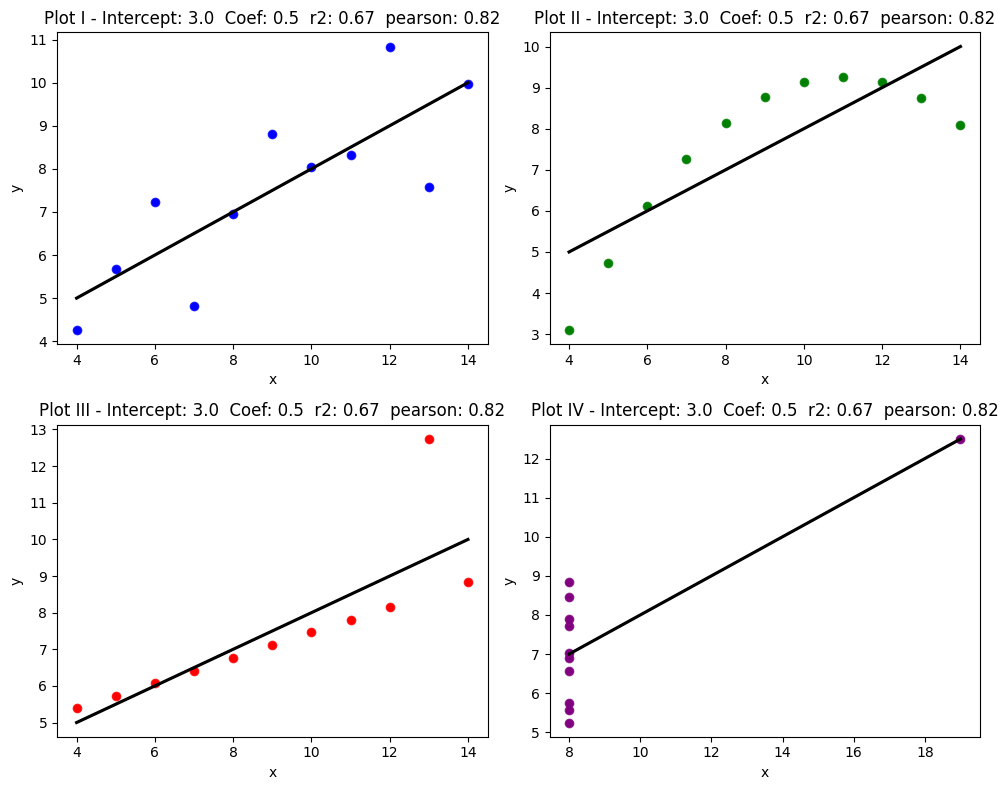

In [134]:
colors = ['blue', 'green', 'red', 'purple']  # Define a list of colors

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for idx, set_ in enumerate(data.dataset.unique()):
    dataset = data.query('dataset == @set_')

    ax = axes[idx // 2, idx % 2]  # Select the correct subplot

    sns.scatterplot(x=dataset['x'], y=dataset['y'], ax=ax, color=colors[idx])
    sns.regplot(x=dataset['x'], y=dataset['y'], ax=ax, ci=0, scatter_kws={'color': colors[idx]}, line_kws={'color': 'black'})
    infos = info[info['Set'] == set_]
    title = f'Plot {infos["Set"].values[0]} - '
    for col in info.columns[1:]:
        title += f'{col}: {round(infos[col].values[0], 2)}  '
    ax.set_title(title.strip())

plt.tight_layout()
plt.show()